CONTENTS:
- [Description](#description)

<a name='description'></a>
# Description

This notebook examines ...

In [ ]:
#!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet jupyterlab-vim)"
#!jupyter labextension enable

In [1]:
%load_ext autoreload
%autoreload 2

import logging

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [2]:
print(henv.get_system_signature()[0])

hprint.config_notebook()

# System signature
  # Container version
    container_version='1.2.0'
    changelog_version='2.0.0'
  # Git info
    branch_name='CmampTask11862_Allow_dind_unit_tests_to_run_on_server_and_CI'
    hash='0ca93d8c'
    # Last commits:
      *   0ca93d8c GP Saggese Merge                                                             ( 5 minutes ago) Fri May 9 22:09:03 2025  (HEAD -> CmampTask11862_Allow_dind_unit_tests_to_run_on_server_and_CI, origin/CmampTask11862_Allow_dind_unit_tests_to_run_on_server_and_CI)
      |\  
      * | 99cbbf22 GP Saggese Lint                                                              ( 6 minutes ago) Fri May 9 22:08:07 2025           
      | * 27b38c48 GP Saggese CmampTask12067_Read_docs_about_DataPull_4 (#698)                  ( 8 minutes ago) Fri May 9 22:06:25 2025  (origin/master, origin/HEAD, master)
  # Platform info
    system=Linux
    node name=0f79e8b845ee
    release=6.10.14-linuxkit
    version=#1 SMP Thu Mar 20 16:32:56 UTC 2025
    machine=aarc

In [3]:
# hdbg.init_logger(verbosity=logging.DEBUG)
hdbg.init_logger(verbosity=logging.INFO)
# hdbg.test_logger()
_LOG = logging.getLogger(__name__)

INFO  > cmd='/venv/lib/python3.12/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-0f2f4a10-7f18-4858-af02-b60808101345.json'


In [5]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet openai requests)"

In [6]:
import helpers.hllm as hllm
import helpers.hpandas as hpandas

In [28]:
val = hllm.get_model_stats()

In [29]:
import pprint

pprint.pprint(val[0])

{'architecture': {'input_modalities': ['text', 'image'],
                  'instruct_type': None,
                  'modality': 'text+image->text',
                  'output_modalities': ['text'],
                  'tokenizer': 'Mistral'},
 'context_length': 131072,
 'created': 1746627341,
 'description': 'Mistral Medium 3 is a high-performance enterprise-grade '
                'language model designed to deliver frontier-level '
                'capabilities at significantly reduced operational cost. It '
                'balances state-of-the-art reasoning and multimodal '
                'performance with 8× lower cost compared to traditional large '
                'models, making it suitable for scalable deployments across '
                'professional and industrial use cases.\n'
                '\n'
                'The model excels in domains such as coding, STEM reasoning, '
                'and enterprise adaptation. It supports hybrid, on-prem, and '
                'in-V

In [65]:
import pandas as pd

In [31]:
# Normalize the nested JSON
df = pd.json_normalize(val, sep="_")
df
# View the resulting DataFrame
# print(df.T)  # Transpose just for readable vertical inspection

,id,name,created,description,context_length,per_request_limits,supported_parameters,architecture_modality,architecture_input_modalities,architecture_output_modalities,architecture_tokenizer,architecture_instruct_type,pricing_prompt,pricing_completion,pricing_request,pricing_image,pricing_web_search,pricing_internal_reasoning,top_provider_context_length,top_provider_max_completion_tokens,top_provider_is_moderated,pricing_input_cache_read,pricing_input_cache_write
0,mistralai/mistral-medium-3,Mistral: Mistral Medium 3,1746627341,Mistral Medium 3 is a high-performance enterpr...,131072,None,"[tools, tool_choice, max_tokens, temperature, ...",text+image->text,"[text, image]",[text],Mistral,None,0.0000004,0.000002,0,0,0,0,131072.0,NaN,False,NaN,NaN
1,google/gemini-2.5-pro-preview,Google: Gemini 2.5 Pro Preview,1746578513,Gemini 2.5 Pro is Google’s state-of-the-art AI...,1048576,None,"[max_tokens, temperature, top_p, tools, tool_c...",text+image->text,"[text, image, file]",[text],Gemini,None,0.00000125,0.00001,0,0.00516,0,0,1048576.0,65535.0,False,0.00000031,0.000001625
2,arcee-ai/caller-large,Arcee AI: Caller Large,1746487869,"Caller Large is Arcee's specialist ""function‑c...",32768,None,"[tools, tool_choice, max_tokens, temperature, ...",text->text,[text],[text],Other,None,0.00000055,0.00000085,0,0,0,0,32768.0,NaN,False,NaN,NaN
3,arcee-ai/spotlight,Arcee AI: Spotlight,1746481552,Spotlight is a 7‑billion‑parameter vision‑lang...,131072,None,"[max_tokens, temperature, top_p, stop, frequen...",text+image->text,"[image, text]",[text],Other,None,0.00000018,0.00000018,0,0,0,0,131072.0,65537.0,False,NaN,NaN
4,arcee-ai/maestro-reasoning,Arcee AI: Maestro Reasoning,1746481269,Maestro Reasoning is Arcee's flagship analysis...,131072,None,"[max_tokens, temperature, top_p, stop, frequen...",text->text,[text],[text],Other,None,0.0000009,0.0000033,0,0,0,0,131072.0,32000.0,False,NaN,NaN
5,arcee-ai/virtuoso-large,Arcee AI: Virtuoso Large,1746478885,Virtuoso‑Large is Arcee's top‑tier general‑pur...,131072,None,"[max_tokens, temperature, top_p, stop, frequen...",text->text,[text],[text],Other,None,0.00000075,0.0000012,0,0,0,0,131072.0,64000.0,False,NaN,NaN
6,arcee-ai/coder-large,Arcee AI: Coder Large,1746478663,Coder‑Large is a 32 B‑parameter offspring of Q...,32768,None,"[max_tokens, temperature, top_p, stop, frequen...",text->text,[text],[text],Other,None,0.0000005,0.0000008,0,0,0,0,32768.0,NaN,False,NaN,NaN
7,arcee-ai/virtuoso-medium-v2,Arcee AI: Virtuoso Medium V2,1746478434,Virtuoso‑Medium‑v2 is a 32 B model distilled f...,131072,None,"[max_tokens, temperature, top_p, stop, frequen...",text->text,[text],[text],Other,None,0.0000005,0.0000008,0,0,0,0,131072.0,32768.0,False,NaN,NaN
8,arcee-ai/arcee-blitz,Arcee AI: Arcee Blitz,1746470100,Arcee Blitz is a 24 B‑parameter dense model di...,32768,None,"[max_tokens, temperature, top_p, stop, frequen...",text->text,[text],[text],Other,None,0.00000045,0.00000075,0,0,0,0,32768.0,NaN,False,NaN,NaN
9,microsoft/phi-4-reasoning-plus:free,Microsoft: Phi 4 Reasoning Plus (free),1746130961,Phi-4-reasoning-plus is an enhanced 14B parame...,32768,None,"[max_tokens, temperature, top_p, reasoning, in...",text->text,[text],[text],Other,None,0,0,0,0,0,0,32768.0,NaN,False,NaN,NaN


In [34]:
df.iloc[0].T

id                                                           mistralai/mistral-medium-3
name                                                          Mistral: Mistral Medium 3
created                                                                      1746627341
description                           Mistral Medium 3 is a high-performance enterpr...
context_length                                                                   131072
per_request_limits                                                                 None
supported_parameters                  [tools, tool_choice, max_tokens, temperature, ...
architecture_modality                                                  text+image->text
architecture_input_modalities                                             [text, image]
architecture_output_modalities                                                   [text]
architecture_tokenizer                                                          Mistral
architecture_instruct_type      

In [39]:
col_names = ["id", "context_length", "pricing_prompt", "pricing_completion"]

In [52]:
df.dtypes

id                                     object
name                                   object
created                                 int64
description                            object
context_length                          int64
per_request_limits                     object
supported_parameters                   object
architecture_modality                  object
architecture_input_modalities          object
architecture_output_modalities         object
architecture_tokenizer                 object
architecture_instruct_type             object
pricing_prompt                         object
pricing_completion                     object
pricing_request                        object
pricing_image                          object
pricing_web_search                     object
pricing_internal_reasoning             object
top_provider_context_length           float64
top_provider_max_completion_tokens    float64
top_provider_is_moderated                bool
pricing_input_cache_read          

#

In [72]:
for col in df.columns:
    print(hpandas.infer_column_types(df[col]))

{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_bool'}
{'is_numeric': 1.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_numeric'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_bool'}
{'is_numeric': 1.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_numeric'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 0.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_bool'}
{'is_numeric': 0.0, 'is_bool': 0.0, 'is_string': 0.38819875776397517, 'type': 'is_bool'}
{'is_numeric': 1.0, 'is_bool': 0.0, 'is_string': 1.0, 'type': 'is_numeric'}
{'is_numeric': 1.0, 'is_bo

In [61]:
df.apply(lambda x: pd.Series(hpandas.infer_column_types(x))).T

,is_numeric,is_bool,is_string
id,0.000000,0.0,1.000000
name,0.000000,0.0,1.000000
created,1.000000,0.0,0.000000
description,0.000000,0.0,1.000000
context_length,1.000000,0.0,0.000000
per_request_limits,0.000000,0.0,0.000000
supported_parameters,0.000000,0.0,0.000000
architecture_modality,0.000000,0.0,1.000000
architecture_input_modalities,0.000000,0.0,0.000000
architecture_output_modalities,0.000000,0.0,0.000000


In [75]:
hpandas.infer_column_types_df(df)

,is_numeric,is_bool,is_string,type
id,0.0,0.0,1.0,is_bool
name,0.0,0.0,1.0,is_bool
created,1.0,0.0,0.0,is_numeric
description,0.0,0.0,1.0,is_bool
context_length,1.0,0.0,0.0,is_numeric
per_request_limits,0.0,0.0,0.0,is_bool
supported_parameters,0.0,0.0,0.0,is_bool
architecture_modality,0.0,0.0,1.0,is_bool
architecture_input_modalities,0.0,0.0,0.0,is_bool
architecture_output_modalities,0.0,0.0,0.0,is_bool


In [62]:
pd.to_numeric(df["pricing_request"], errors="coerce").notna()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [50]:
df["pricing_completion"]

0         0.000002
1          0.00001
2       0.00000085
3       0.00000018
4        0.0000033
5        0.0000012
6        0.0000008
7        0.0000008
8       0.00000075
9                0
10      0.00000035
11               0
12               0
13        0.000001
14               0
15               0
16               0
17               0
18               0
19      0.00000218
20      0.00000005
21               0
22       0.0000003
23               0
24     0.000000138
25               0
26      0.00000024
27               0
28       0.0000003
29               0
30        0.000002
31               0
32      0.00000024
33               0
34               0
35               0
36               0
37      0.00000024
38               0
39      0.00000024
40       0.0000006
41       0.0000035
42       0.0000044
43         0.00004
44       0.0000044
45               0
46      0.00000003
47        0.000008
48       0.0000016
49       0.0000004
50       0.0000012
51       0.0000012
52          

In [40]:
df.sort_values("pricing_prompt")[col_names]

,id,context_length,pricing_prompt,pricing_completion
302,openrouter/auto,2000000,-1,-1
133,deepseek/deepseek-r1-distill-qwen-32b:free,16000,0,0
59,nvidia/llama-3.1-nemotron-ultra-253b-v1:free,131072,0,0
113,cognitivecomputations/dolphin3.0-r1-mistral-24...,32768,0,0
57,nvidia/llama-3.3-nemotron-super-49b-v1:free,131072,0,0
114,cognitivecomputations/dolphin3.0-mistral-24b:free,32768,0,0
54,moonshotai/kimi-vl-a3b-thinking:free,131072,0,0
53,agentica-org/deepcoder-14b-preview:free,96000,0,0
52,arliai/qwq-32b-arliai-rpr-v1:free,32768,0,0
231,meta-llama/llama-3.1-8b-instruct:free,131072,0,0


<Axes: xlabel='pricing_prompt', ylabel='pricing_completion'>

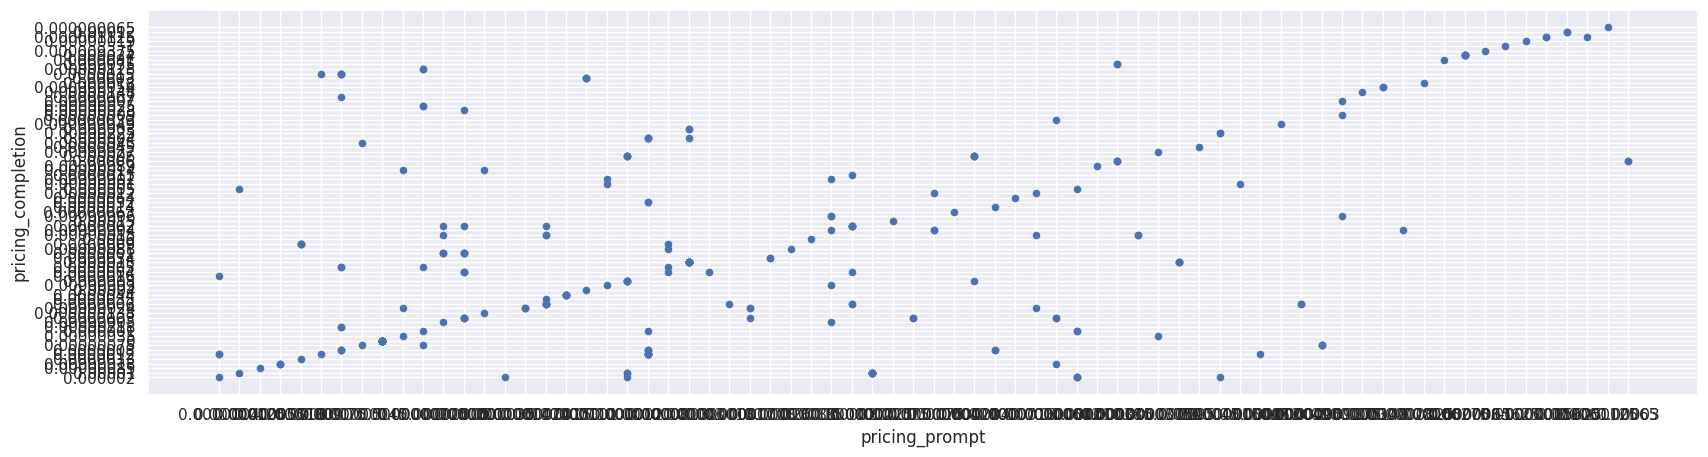

In [45]:
df[["pricing_prompt", "pricing_completion"]].plot.scatter(
    x="pricing_prompt", y="pricing_completion"
)

In [46]:
df["price_ratio"] = df["pricing_completion"] / df["pricing_prompt"]

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# df["total_price"] =